In [171]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import MeanShift
from sklearn import preprocessing
import pandas as pd

In [172]:
df = pd.read_excel('titanic.xls')
original_df = pd.DataFrame.copy(df)

In [173]:
df.drop(['body','name'], 1, inplace=True)

In [174]:
#df.convert_objects(convert_numeric=True)
df.fillna(0, inplace=True)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

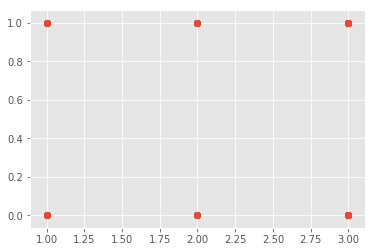

In [175]:
def handle_non_numerical_data(df):
    
    # handling non-numerical data: must convert.
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        #print(column,df[column].dtype)
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            
            column_contents = df[column].values.tolist()
            #finding just the uniques
            unique_elements = set(column_contents)
            # great, found them. 
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    # creating dict that contains new
                    # id per unique string
                    text_digit_vals[unique] = x
                    x+=1
            # now we map the new "id" value
            # to replace the string. 
            df[column] = list(map(convert_to_int,df[column]))

    return df

df = handle_non_numerical_data(df)
df.drop(['ticket','home.dest'], 1, inplace=True)

X = np.array(df.drop(['survived'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

clf = MeanShift()
clf.fit(X)

In [176]:
labels = clf.labels_
cluster_centers = clf.cluster_centers_
original_df['cluster_group']=np.nan

In [177]:
for i in range(len(X)):
    original_df['cluster_group'].iloc[i] = labels[i]
    
n_clusters_ = len(np.unique(labels))
survival_rates = {}
for i in range(n_clusters_):
    temp_df = original_df[ (original_df['cluster_group']==float(i)) ]
    #print(temp_df.head())

    survival_cluster = temp_df[  (temp_df['survived'] == 1) ]

    survival_rate = len(survival_cluster) / len(temp_df)
    #print(i,survival_rate)
    survival_rates[i] = survival_rate
    
print(survival_rates)

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


{0: 0.3728813559322034, 1: 0.6078431372549019, 2: 1.0, 3: 0.4, 4: 0.1, 5: 1.0}


In [178]:
print(original_df[ (original_df['cluster_group']==1) ])

      pclass  survived                                               name  \
0          1         1                      Allen, Miss. Elisabeth Walton   
1          1         1                     Allison, Master. Hudson Trevor   
2          1         0                       Allison, Miss. Helen Loraine   
3          1         0               Allison, Mr. Hudson Joshua Creighton   
4          1         0    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
10         1         0                             Astor, Col. John Jacob   
11         1         1  Astor, Mrs. John Jacob (Madeleine Talmadge Force)   
16         1         0                           Baxter, Mr. Quigg Edmond   
17         1         1    Baxter, Mrs. James (Helene DeLaudeniere Chaput)   
23         1         1                              Bidois, Miss. Rosalie   
24         1         1                                  Bird, Miss. Ellen   
35         1         1                           Bowen, Miss. Grace Scott   

In [179]:
print(original_df[ (original_df['cluster_group']==0) ].describe())

            pclass     survived         age        sibsp        parch  \
count  1239.000000  1239.000000  988.000000  1239.000000  1239.000000   
mean      2.337369     0.372881   29.523532     0.427764     0.294592   
std       0.814340     0.483766   14.278212     0.833121     0.645272   
min       1.000000     0.000000    0.166700     0.000000     0.000000   
25%       2.000000     0.000000   21.000000     0.000000     0.000000   
50%       3.000000     0.000000   28.000000     0.000000     0.000000   
75%       3.000000     1.000000   38.000000     1.000000     0.000000   
max       3.000000     1.000000   80.000000     5.000000     4.000000   

              fare        body  cluster_group  
count  1238.000000  115.000000         1239.0  
mean     24.770893  161.452174            0.0  
std      27.381611   98.333504            0.0  
min       0.000000    1.000000            0.0  
25%       7.895800   71.000000            0.0  
50%      13.000000  165.000000            0.0  
75%   

In [180]:
print(original_df[ (original_df['cluster_group']==4) ])

      pclass  survived                                               name  \
629        3         0                        Andersson, Mr. Anders Johan   
632        3         0  Andersson, Mrs. Anders Johan (Alfrida Konstant...   
644        3         0         Asplund, Mr. Carl Oscar Vilhelm Gustafsson   
646        3         1  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...   
831        3         0                     Goodwin, Mr. Charles Frederick   
832        3         0            Goodwin, Mrs. Frederick (Augusta Tyler)   
1106       3         0             Panula, Mrs. Juha (Maria Emilia Ojala)   
1146       3         0               Rice, Mrs. William (Margaret Norton)   
1179       3         0                              Sage, Mr. John George   
1180       3         0                     Sage, Mrs. John (Annie Bullen)   

         sex   age  sibsp  parch    ticket     fare cabin embarked boat  \
629     male  39.0      1      5    347082  31.2750   NaN        S  NaN   
63